In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
import joblib

nlist = joblib.load('nlist.pkl')

In [3]:
len(nlist)

26716

In [4]:
total_df = pd.read_pickle('total_df.pkl')

In [5]:
len(total_df)
y = total_df['keyword']
len(y)

26716

In [6]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

In [7]:
vectorizer = CountVectorizer(stop_words={'english'},min_df=50, max_df=.01 ,ngram_range=(1,2))

cv = vectorizer.fit_transform(nlist)

#vectorizer.get_feature_names()

In [8]:
cv.data
cv.max()

53

In [9]:
vectorizer.get_feature_names()[:30]

['02',
 '02 years',
 '02114',
 '02115',
 '02115 job',
 '10 billion',
 '10 enterprise',
 '10 hour',
 '10 paid',
 '10 time',
 '100 best',
 '100 company',
 '100 contributions',
 '100 countries',
 '100 million',
 '100 paid',
 '1000 largest',
 '10000',
 '100000',
 '100m',
 '1012',
 '1012 software',
 '1012 years',
 '1015',
 '1020',
 '10campus',
 '10campus uc',
 '10x',
 '11 interventions',
 '110']

In [10]:
X = cv

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=4545)

In [12]:
## Training a classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB().fit(X_train, y_train)
clf = AdaBoostClassifier().fit(X_train, y_train)

In [13]:
#clf.class_count_
clf.classes_
clf.get_params()
clf.score(X_train, y_train)
#clf.feature_count_
#clf.coef_
#clf.predict(X_test)

0.34206726912999302

In [14]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss

In [15]:
print(classification_report(y_test,clf.predict(X_test)))

                precision    recall  f1-score   support

  data+analyst       0.36      0.08      0.13      2122
data+architect       0.45      0.01      0.02      1673
 data+engineer       0.30      0.96      0.46      2077
data+scientist       0.20      0.06      0.10      1292
  statistician       0.85      0.48      0.61       851

   avg / total       0.39      0.33      0.24      8015



In [16]:
print('Accuracy Score(Train): ',accuracy_score(y_train,clf.predict(X_train)))
print('Hamming Loss(Train): ',hamming_loss(y_train,clf.predict(X_train)))


print('Accuracy Score(Test): ',accuracy_score(y_test,clf.predict(X_test)))
print('Hamming Loss(Test): ',hamming_loss(y_test,clf.predict(X_test)))


Accuracy Score(Train):  0.34206726913
Hamming Loss(Train):  0.65793273087
Accuracy Score(Test):  0.331253898939
Hamming Loss(Test):  0.668746101061


In [17]:
con_mat = confusion_matrix(y_test,clf.predict(X_test))
con_mat_train = confusion_matrix(y_train,clf.predict(X_train))
print(con_mat)
print(con_mat_train)

[[ 162    5 1893   31   31]
 [  38   19 1603    6    7]
 [  55    8 1989   17    8]
 [  85   10 1091   80   26]
 [ 111    0   77  258  405]]
[[ 366   17 4347   57   51]
 [ 114   44 3746   20    6]
 [ 113   29 4741   27   13]
 [ 154   19 2462  200   53]
 [ 297    4  131  644 1046]]


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb


In [19]:
list(clf.classes_)

['data+analyst',
 'data+architect',
 'data+engineer',
 'data+scientist',
 'statistician']

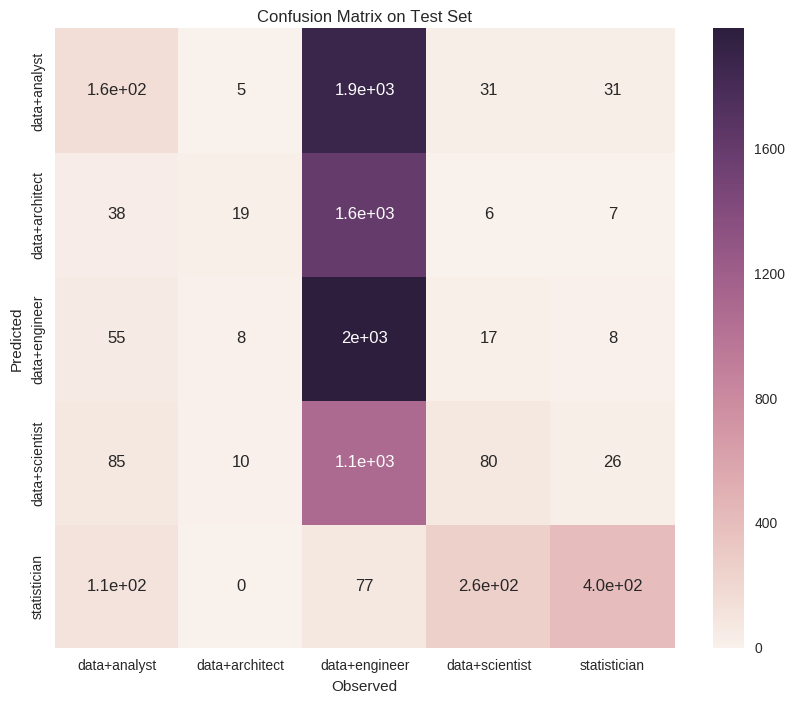

In [20]:
sb.set_palette("GnBu")
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(con_mat,
           xticklabels=list(clf.classes_),
           yticklabels=list(clf.classes_),
           annot=True);
plt.xlabel('Observed');
plt.ylabel('Predicted');
plt.title('Confusion Matrix on Test Set');


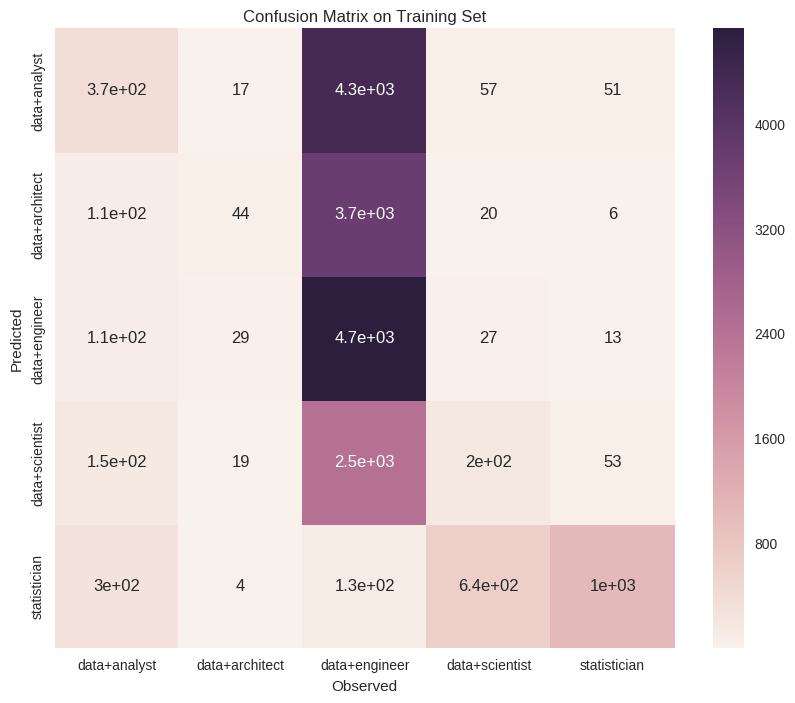

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(con_mat_train,xticklabels=list(clf.classes_),yticklabels=list(clf.classes_),annot=True);
plt.xlabel('Observed');
plt.ylabel('Predicted');
plt.title('Confusion Matrix on Training Set');
